In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lg
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder,OneHotEncoder


from sklearn.model_selection import train_test_split, learning_curve
from sklearn.compose import ColumnTransformer,make_column_selector

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from  xgboost import XGBClassifier

from sklearn.metrics import (classification_report,accuracy_score,confusion_matrix,
                             precision_score, recall_score, f1_score)



/home/ali/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('HotelReservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df=df.replace('NaN', float(np.nan), regex=True)

In [4]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
df=df.drop(columns="Booking_ID")
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


### Looking at the booking status, we see that 35% of the bookings have been cancelled

Text(0.5, 1.0, 'booking_status')

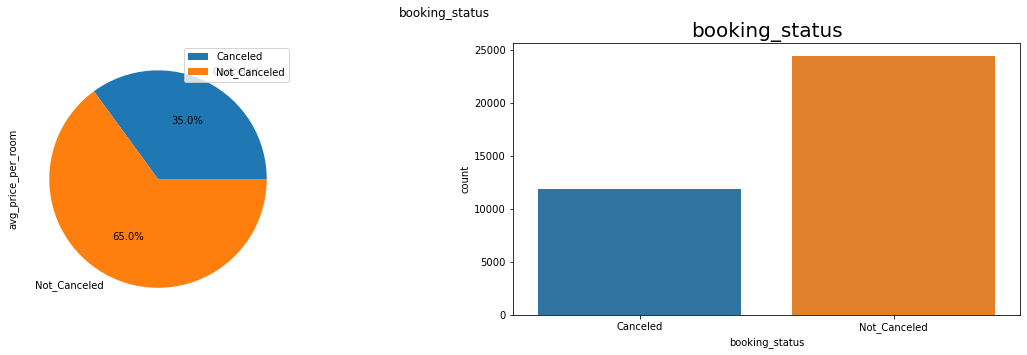

In [8]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))
fig1=df[['booking_status','avg_price_per_room']].groupby('booking_status').sum()
fig1.plot(kind='pie',ax= ax1,autopct='%1.1f%%',subplots=True,figsize=(15,9),title='booking_status')
plot = sns.countplot(x ='booking_status',ax= ax2, data = df.sort_values(by='booking_status'))
plot.axes.set_title("booking_status",fontsize=20)

### Looking at the reservation status, almost 70% of the reservations are made online, 25% of the reservations are made offline.

Text(0.5, 1.0, 'market_segment_type')

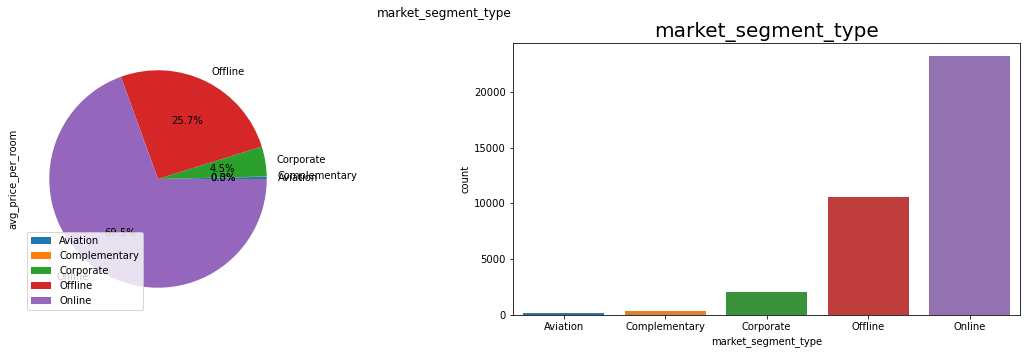

In [9]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))
fig1=df[['market_segment_type','avg_price_per_room']].groupby('market_segment_type').sum()
fig1.plot(kind='pie',ax= ax1,autopct='%1.1f%%',subplots=True,figsize=(15,9),title='market_segment_type')
plot = sns.countplot(x ='market_segment_type',ax= ax2, data = df.sort_values(by='market_segment_type'))
plot.axes.set_title("market_segment_type",fontsize=20)

####  Looking at the boxplot and plot, we will see that the average price range for room reservation is around 100 euros

<AxesSubplot:xlabel='avg_price_per_room'>

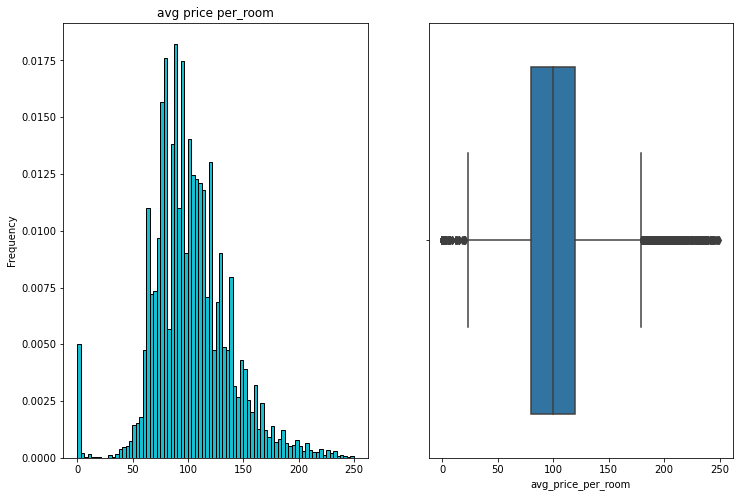

In [10]:
df1=df[df['avg_price_per_room']<250]
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))
df1['avg_price_per_room'].plot(kind='hist',edgecolor = 'black',color='tab:cyan',
                    density = 1,ax= ax1,title='avg price per_room',bins=80, figsize=(12,8))
sns.boxplot(data=df1,ax= ax2, x="avg_price_per_room")

#### Looking at our continuous variables we can see that generally reservations are made without taking too long, the longer it takes, the smaller the number of reservations,

<AxesSubplot:xlabel='lead_time'>

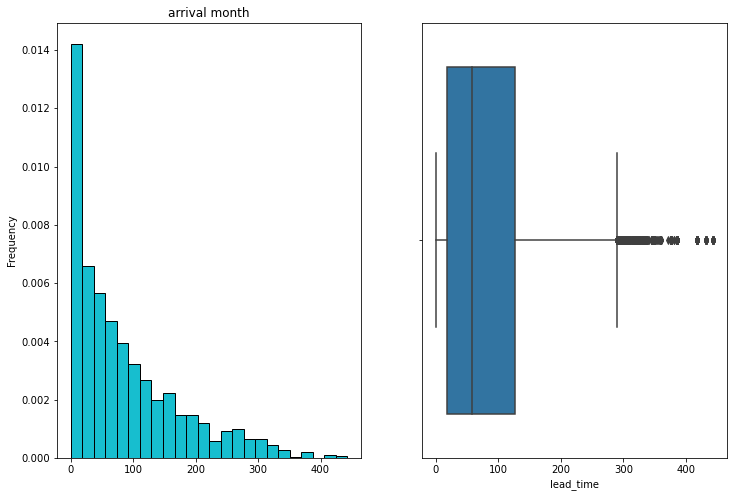

In [11]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))
df1['lead_time'].plot(kind='hist',edgecolor = 'black',color='tab:cyan',
                    density = 1,ax= ax1,title='arrival month',bins=24, figsize=(12,8))
sns.boxplot(data=df1,ax= ax2, x="lead_time")

#### Looking at arrival month, we can see that reservations are usually made in late summer and early fall

<AxesSubplot:xlabel='arrival_month'>

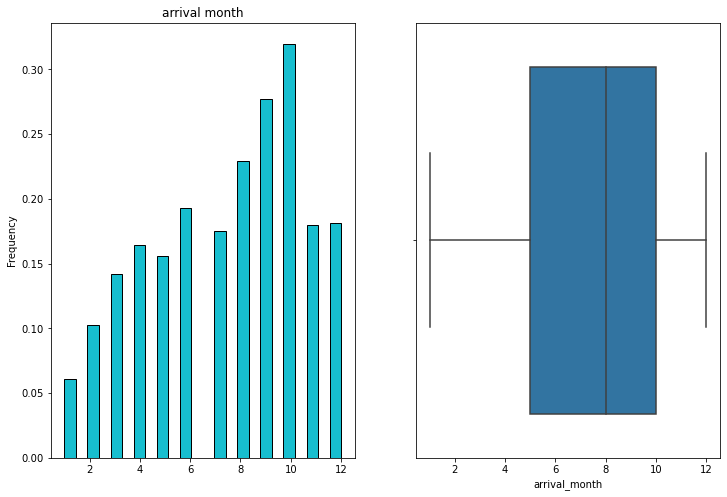

In [12]:

fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))
df1['arrival_month'].plot(kind='hist',edgecolor = 'black',color='tab:cyan',
                    density = 1,ax= ax1,title='arrival month',bins=24, figsize=(12,8))
sns.boxplot(data=df1,ax= ax2, x="arrival_month")

<AxesSubplot:xlabel='arrival_year'>

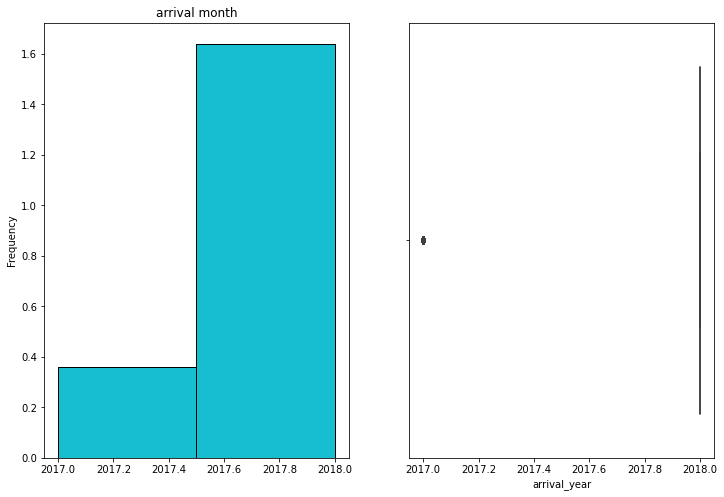

In [13]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))
df1['arrival_year'].plot(kind='hist',edgecolor = 'black',color='tab:cyan',
                    density = 1,ax= ax1,title='arrival month',bins=2, figsize=(12,8))
sns.boxplot(data=df1,ax= ax2, x="arrival_year")

/home/ali/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/ali/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


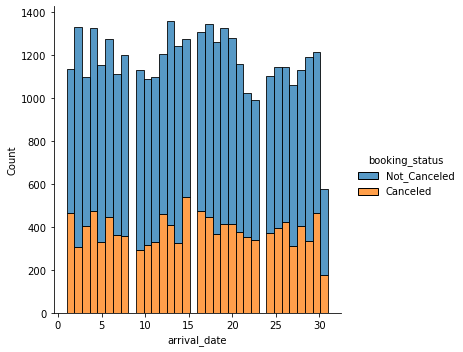

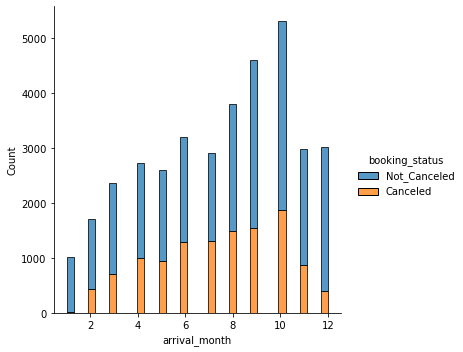

In [14]:
sns.displot(df, x="arrival_date", hue="booking_status",ax= ax1, multiple="stack",)
sns.displot(df, x="arrival_month", hue="booking_status",ax= ax2, multiple="stack",)

<AxesSubplot:xlabel='arrival_date'>

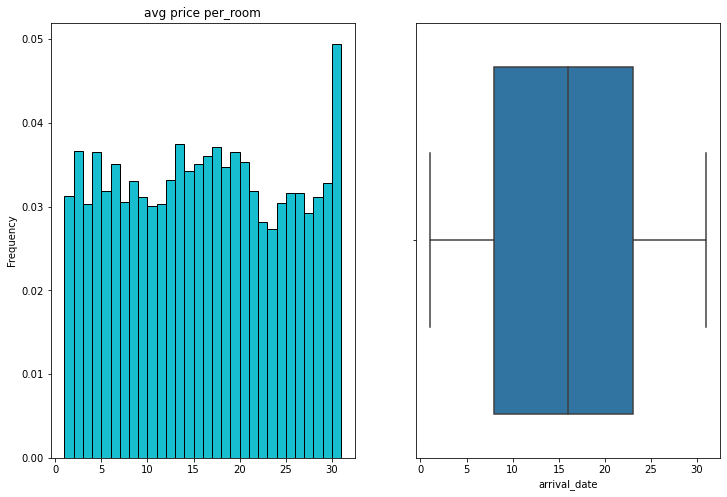

In [15]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))
df['arrival_date'].plot(kind='hist',edgecolor = 'black',color='tab:cyan',
                    density = 1,ax= ax1,title='avg price per_room',bins=30, figsize=(12,8))


sns.boxplot(data=df,ax= ax2, x="arrival_date")



<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

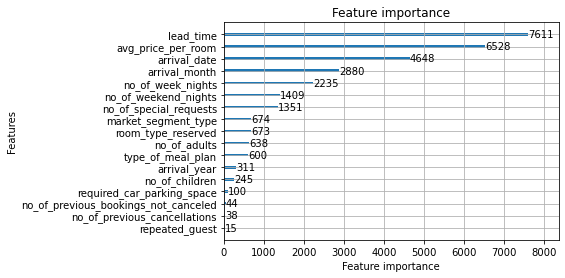

In [16]:

dt = df.copy()
for l in dt.select_dtypes(include='object'):
    dt[l] = LabelEncoder().fit_transform(dt[l])
        
X = dt.drop('booking_status', axis=1)
y = dt['booking_status']
md = lg.LGBMClassifier(n_estimators=1000).fit(X,y)
lg.plot_importance(md) 

Text(0.5, 1.0, 'type_of_meal_plan')

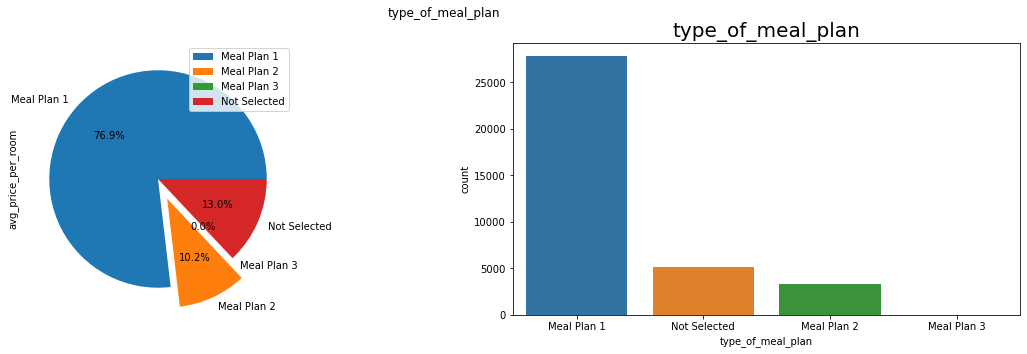

In [17]:
explode = [0,.2,0,0]
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))
fig1=df[['type_of_meal_plan','avg_price_per_room']].groupby('type_of_meal_plan').sum()
fig1.plot(kind='pie',ax= ax1,autopct='%1.1f%%',explode=explode,subplots=True,figsize=(15,9),title='type_of_meal_plan')
plot = sns.countplot(x ='type_of_meal_plan',ax= ax2, data = df)
plot.axes.set_title("type_of_meal_plan",fontsize=20)

Text(0.5, 1.0, 'type_of_meal_plan')

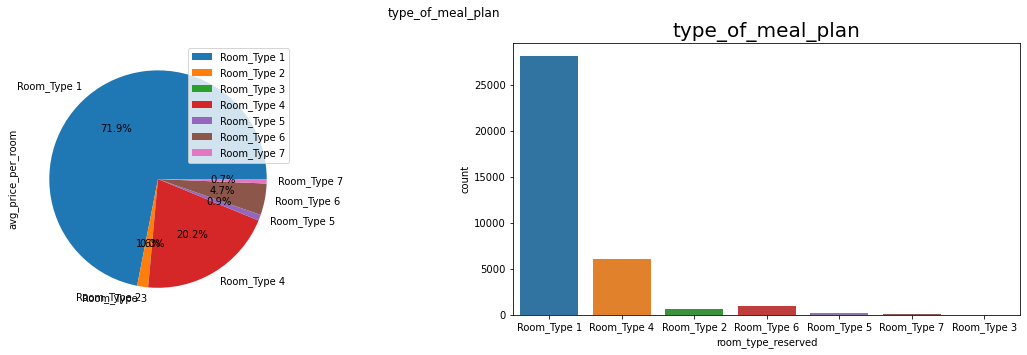

In [18]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))
fig1=df[['room_type_reserved','avg_price_per_room']].groupby('room_type_reserved').sum()
fig1.plot(kind='pie',ax= ax1,autopct='%1.1f%%',subplots=True,figsize=(15,9),title='type_of_meal_plan')
plot = sns.countplot(x ='room_type_reserved',ax= ax2, data = df)
plot.axes.set_title("type_of_meal_plan",fontsize=20)

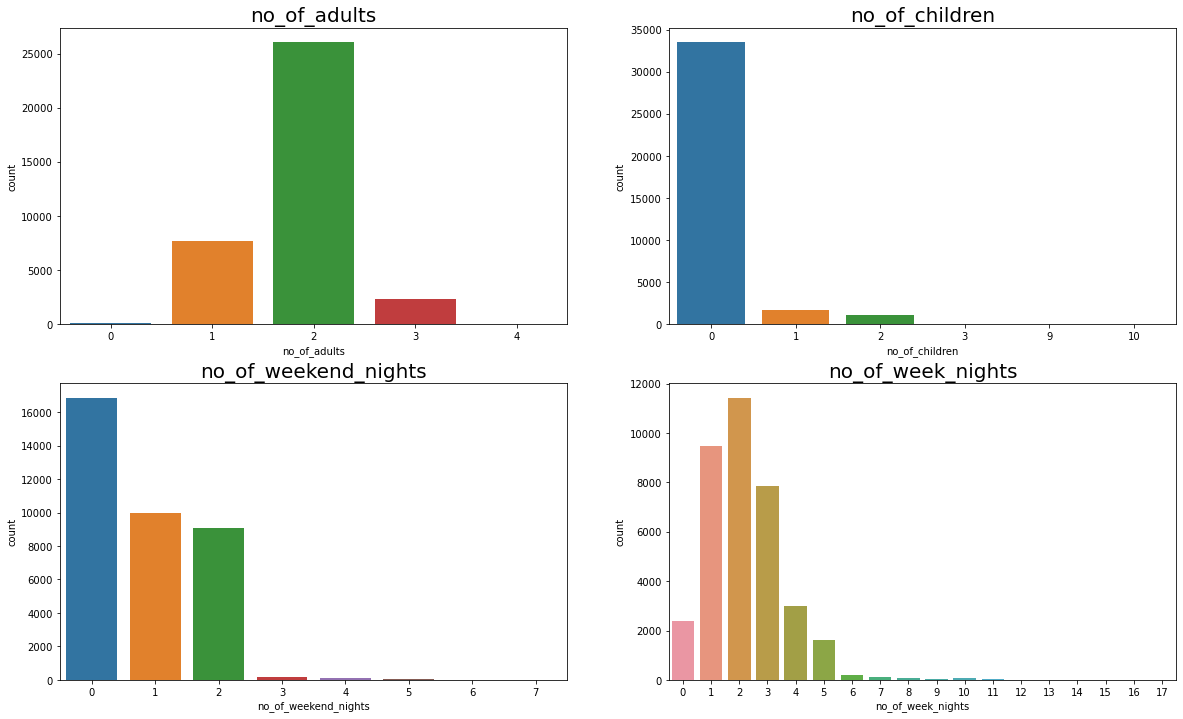

In [19]:
no_of_list= ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights']
i=0
fig, ax= plt.subplots(2,2,figsize=(20,12), layout=None)

for no_of in no_of_list:
    plot = sns.countplot(x =no_of ,ax= ax.flat[i], data = df)
    plot.axes.set_title(no_of,fontsize=20)
    i+=1

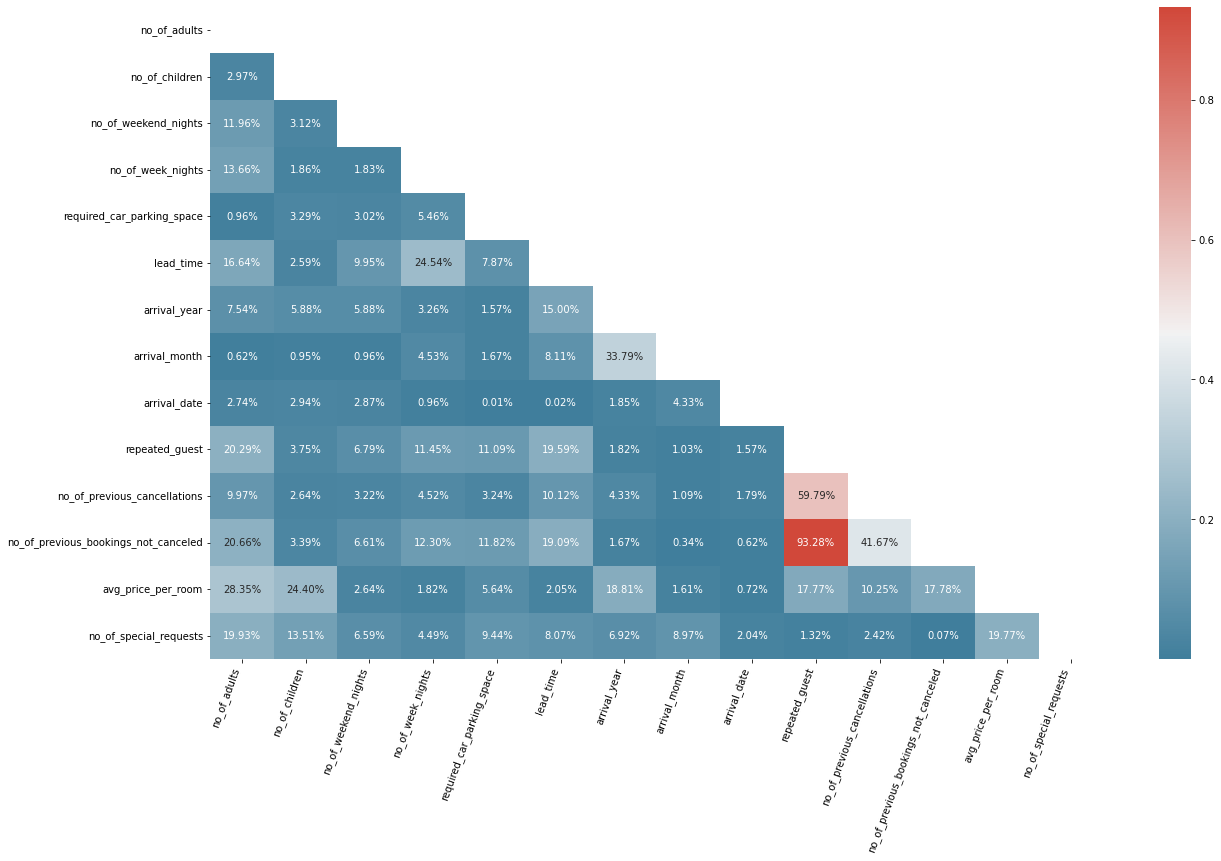

In [20]:
corr = abs(df.corr(method='spearman'))
col = corr.sum(1)[corr.sum(1)>1].index
corr = corr.loc[col,col]
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20,12))
cmap = sns.diverging_palette(230, 15, as_cmap=True)
fig=sns.heatmap(corr[col], mask=mask, cmap=cmap,  annot=True, fmt=".2%")
fig.set_xticklabels(fig.get_xticklabels(), rotation=70, horizontalalignment='right');

<AxesSubplot:xlabel='lead_time', ylabel='booking_status'>

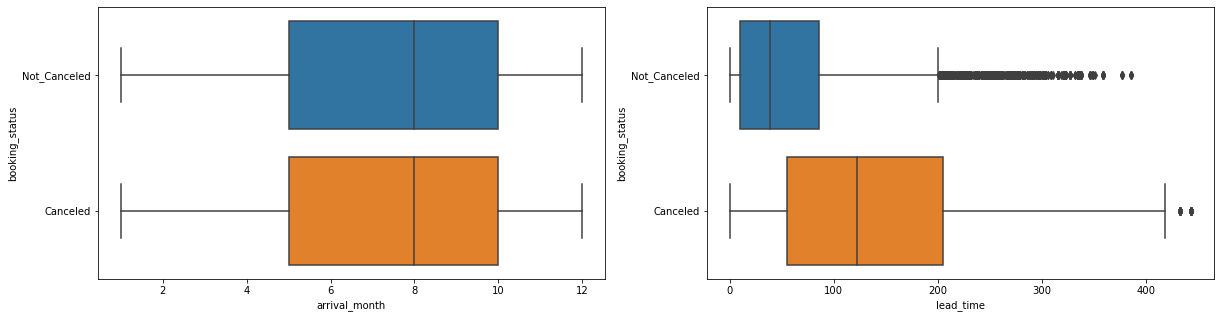

In [21]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data=df,x="arrival_month",y="booking_status",ax=ax1)
sns.boxplot(data=df,x="lead_time",y="booking_status",ax= ax2)

In [22]:
df['type_of_meal_plan']=pd.factorize(df.type_of_meal_plan)[0]
df['room_type_reserved']=pd.factorize(df.room_type_reserved)[0]
df['market_segment_type']=pd.factorize(df.market_segment_type)[0]
df['booking_status']=pd.factorize(df.booking_status)[0]


In [23]:
X= df.drop('booking_status',axis=1)
y =  df['booking_status']

In [24]:
oh=OneHotEncoder(drop='first',handle_unknown='ignore')
s1=StandardScaler()
m1=MinMaxScaler()

ct=ColumnTransformer(
                    [
#                         ('cat_encoder',oh,make_column_selector(dtype_include='object')),
                        ('StandardScaler',s1,make_column_selector(dtype_include='object')),
                        ('Numerical Scaler',m1,make_column_selector(dtype_exclude='object')),  
                    ]
                    ,remainder='passthrough')
X=ct.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [26]:
svc = SVC(max_iter=50000)
dtc = DecisionTreeClassifier()
knnc = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=5000,
                             max_depth=15,min_samples_split= 4)
abc = AdaBoostClassifier(n_estimators=3000,learning_rate=.85)
cbc = CatBoostClassifier(iterations=7500, learning_rate=1,depth=16,eval_metric='MAE', verbose=150,task_type='GPU')
gbc = GradientBoostingClassifier(learning_rate= 0.2, max_depth= 15, max_features= 8, min_samples_split= 8)
xg_reg  =XGBClassifier(max_depth=15,min_child_weight= 1,gamma= 0.5, learning_rate= 0.2,n_jobs=-1)

class_list=[svc,dtc,knnc,rfc,abc,gbc]

In [27]:
%%time

counter=1
for reg in class_list:
    reg.fit(X_train,y_train)
    print(f"Fitting {counter} done")
    counter+=1

Fitting 1 done
Fitting 2 done
Fitting 3 done
Fitting 4 done
Fitting 5 done
Fitting 6 done
CPU times: user 7min 9s, sys: 4.92 s, total: 7min 14s
Wall time: 3min 30s


In [28]:
%%time
score_dict={}

for reg in class_list:
    
    reg_name = reg.__class__.__name__
    
    pred=reg.predict(X_test)
    
    print("-"*50)
    
    print(reg_name)
  
    print(f"accuracy score : {accuracy_score(y_test,pred)}")
    print(f"classification report : {classification_report(y_test,pred)}")
    print(f"confusion matrix :\n {confusion_matrix(y_test, pred)}")
    print(f"precision score :\n {precision_score(y_test, pred)}")
    print(f"recall score :\n {recall_score(y_test, pred)}")
    print(f"f1_score :\n {f1_score(y_test, pred)}")

    score_dict[reg_name]={
        "accuracy score":accuracy_score(y_test,pred),
        "classification report" :classification_report(y_test,pred),
        "precision score" :precision_score(y_test,pred),
        "recall scoret" :recall_score(y_test,pred),
        "f1_score" :f1_score(y_test,pred),
    }

--------------------------------------------------
SVC
accuracy score : 0.8288077188146106
classification report :               precision    recall  f1-score   support

           0       0.84      0.92      0.88      4854
           1       0.80      0.65      0.71      2401

    accuracy                           0.83      7255
   macro avg       0.82      0.78      0.80      7255
weighted avg       0.83      0.83      0.82      7255

confusion matrix :
 [[4457  397]
 [ 845 1556]]
precision score :
 0.7967229902713774
recall score :
 0.6480633069554352
f1_score :
 0.714745062011943
--------------------------------------------------
DecisionTreeClassifier
accuracy score : 0.8682288077188146
classification report :               precision    recall  f1-score   support

           0       0.90      0.90      0.90      4854
           1       0.80      0.80      0.80      2401

    accuracy                           0.87      7255
   macro avg       0.85      0.85      0.85      7255
we

In [31]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values("accuracy score" ,ascending=False)
score_pd

,accuracy score,classification report,precision score,recall scoret,f1_score
GradientBoostingClassifier,0.903515,precision recall f1-score ...,0.886415,0.812578,0.847892
RandomForestClassifier,0.898415,precision recall f1-score ...,0.888785,0.79217,0.837701
DecisionTreeClassifier,0.868229,precision recall f1-score ...,0.803444,0.796751,0.800084
KNeighborsClassifier,0.851826,precision recall f1-score ...,0.801364,0.734277,0.766355
AdaBoostClassifier,0.837767,precision recall f1-score ...,0.786785,0.699292,0.740463
SVC,0.828808,precision recall f1-score ...,0.796723,0.648063,0.714745
